In [64]:
import pandas as pd
df = pd.read_csv('numinput.csv', sep=',')

In [65]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# Get train and test data
train, test = np.split(df, [int(1*len(df))])
# TODO: Generate a train and test for clustering validation


# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(train, quantile=0.2, n_samples=200)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 4


In [59]:
# Verifying clusters with Silhouette

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(train, labels)
print("For n_clusters =", bandwidth, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4.397920477773145 The average silhouette_score is : 0.2816085490861877


In [67]:
# Adding Cluster ID to values in dataframe

df['group'] = labels.tolist()

In [68]:
# Desision Tree from responses in clusters

from sklearn import tree
import pydot
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)


data = df.drop('group', axis=1)
target = df['group'].values.tolist()
clf = clf.fit(data, target)
# TODO: TEST

tree.export_graphviz(clf, out_file='graphs/group.dot')
(graph,) = pydot.graph_from_dot_file('graphs/group.dot')
graph.write_png('graphs/group.png')



In [69]:
# Adding labels to tree

import re
for node in graph.get_node_list():
    label = node.get_label()

    key_regexp = 'X\[[0-9]+\]'
    index_regexp = '[0-9]+'
    
    if label!= None:
        resp = re.search(key_regexp, label)
        if resp!= None:
            key = resp.group()
            index = re.search(index_regexp, key)
            node.set_label(re.sub(key_regexp, df.columns[int(index.group())], label))

graph.write_png('graphs/group.png')

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


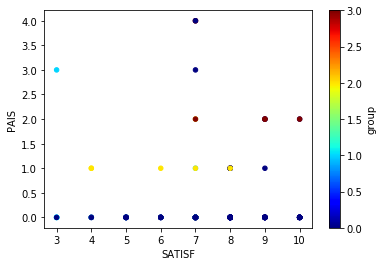

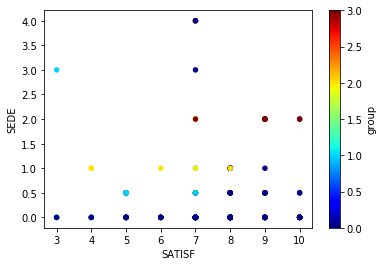

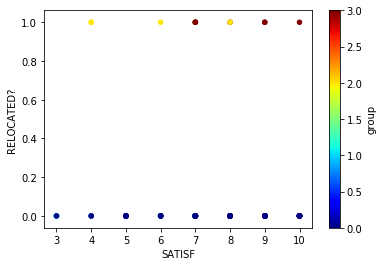

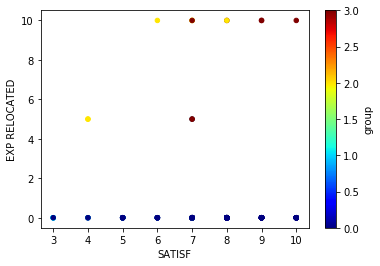

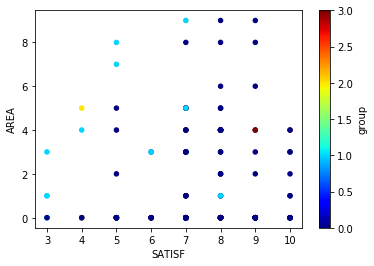

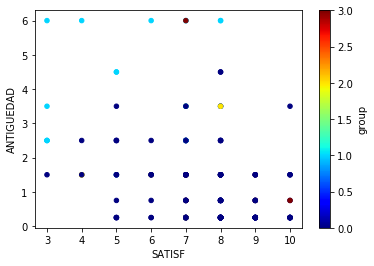

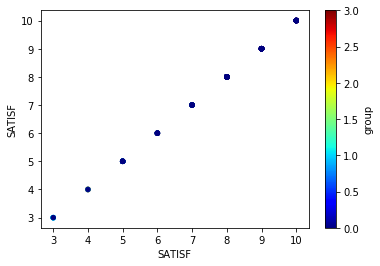

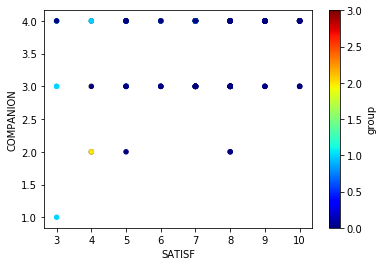

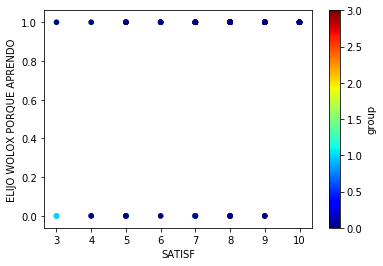

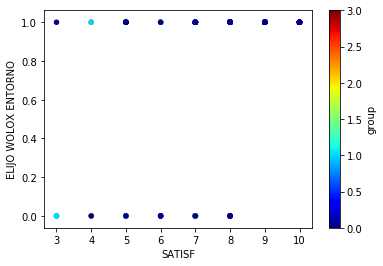

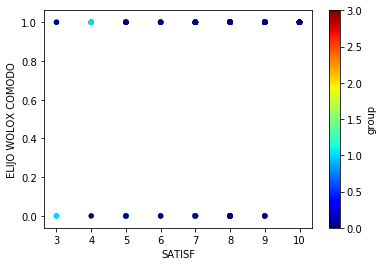

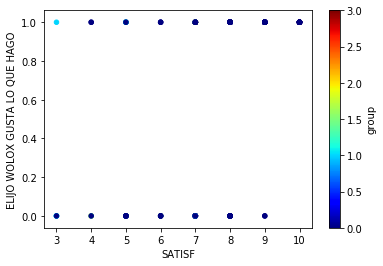

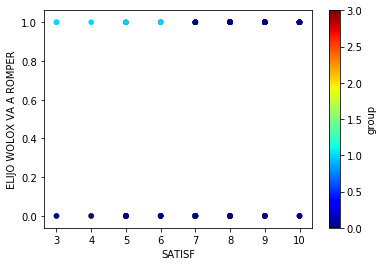

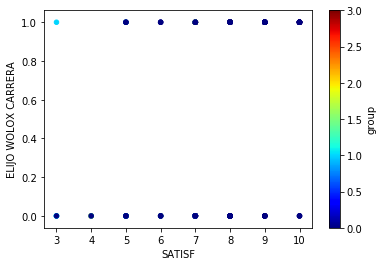

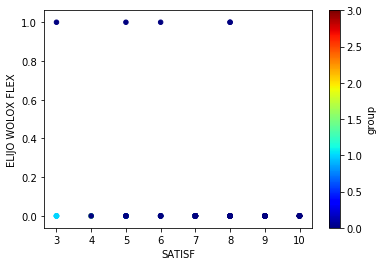

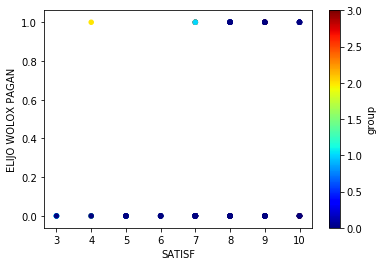

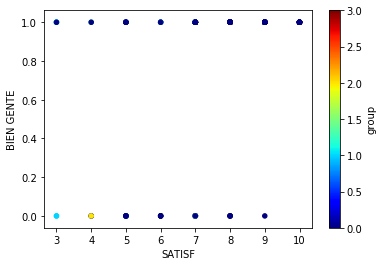

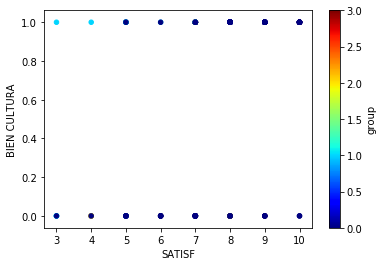

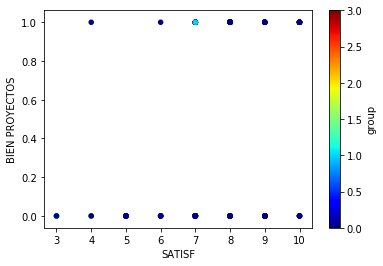

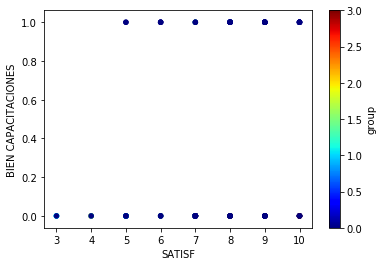

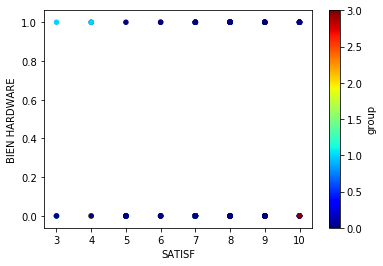

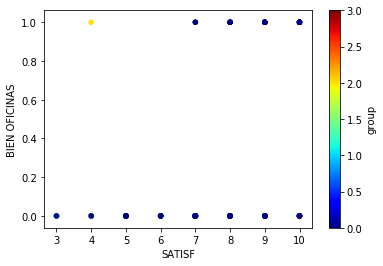

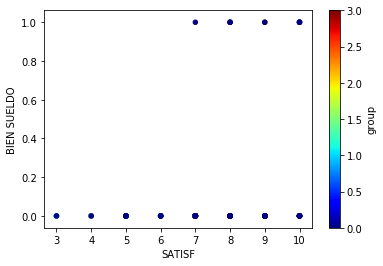

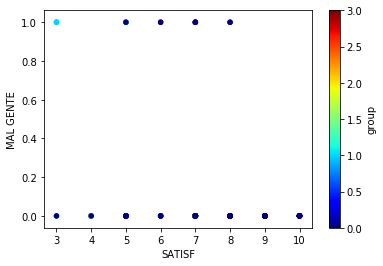

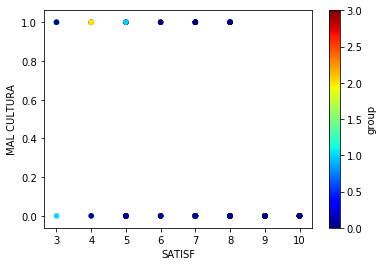

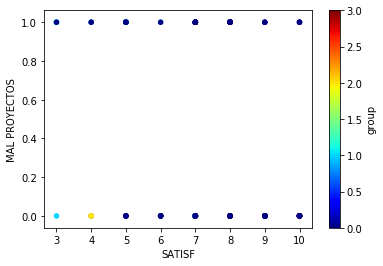

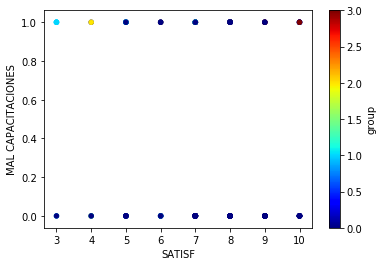

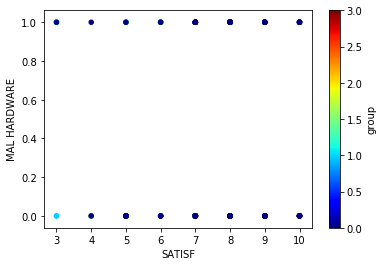

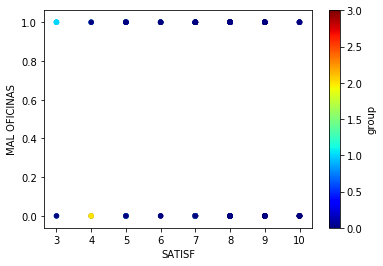

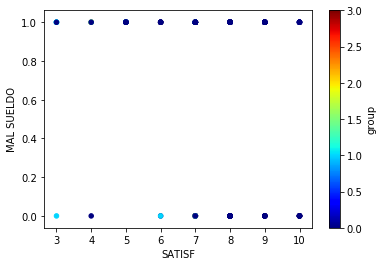

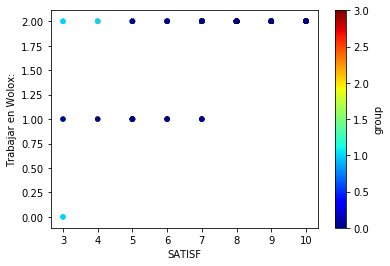

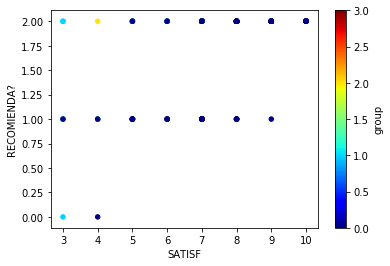

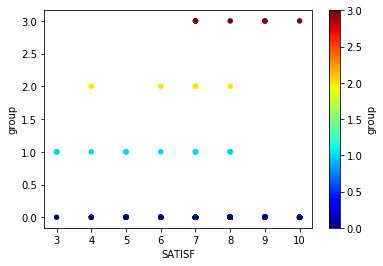

In [70]:
# Scatter plot SATISF VS Other attributes -With the color as cluster-

for column in df.columns:
    img = df.plot.scatter(x='SATISF', y=column, c='group', colormap='jet', sharex=False)
    img.get_figure().savefig("graphs/SATISF_"+column+"_CLUSTERS.png")

In [119]:
# Obtaining correlations

data = []
corr = df.corr()

# Sorting attributes correlations

for column in corr.columns:
    for i in range(df.columns.get_loc(column) + 1, df.columns.values.size -1):
        data.append([corr[column][i], column, corr.columns[i]])
        
formatted_corr = pd.DataFrame(data, columns= ['Score', 'Attr1', 'Attr2'])
formatted_corr.sort_values(by=['Score'], ascending=False).to_csv('correlations.csv')



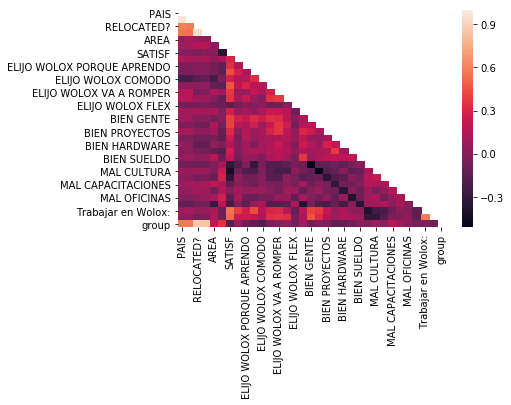

In [115]:
# Correlation graph

import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=False, mask=mask)
plt.savefig('graphs/corr.png')